<a href="https://colab.research.google.com/github/zhpinkman/coursera-nlp/blob/master/NER_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
!wget https://raw.githubusercontent.com/Text-Mining/Persian-NER/master/Persian-NER-part3.txt
!wget https://raw.githubusercontent.com/Text-Mining/Persian-NER/master/Persian-NER-part4.txt
!wget https://raw.githubusercontent.com/Text-Mining/Persian-NER/master/Persian-NER-part5.txt

--2020-08-18 17:19:04--  https://raw.githubusercontent.com/Text-Mining/Persian-NER/master/Persian-NER-part3.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 56781530 (54M) [text/plain]
Saving to: ‘Persian-NER-part3.txt’

Persian-NER-part3.t 100%[===================>]  54.15M  72.1MB/s    in 0.8s    

2020-08-18 17:19:05 (72.1 MB/s) - ‘Persian-NER-part3.txt’ saved [56781530/56781530]

--2020-08-18 17:19:14--  https://raw.githubusercontent.com/Text-Mining/Persian-NER/master/Persian-NER-part4.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Leng

In [3]:
raw_datas_x = []
raw_datas_y = []
current_line_x = []
current_line_y = []
for i in range(3, 6):
    with open('Persian-NER-part' + str(i) + '.txt') as data_file:
        for line in data_file:
            line = line[:-1]
            line_data = line.split('\t')
            if line_data[0] == '':
                raw_datas_x.append(current_line_x)
                raw_datas_y.append(current_line_y)
                current_line_x = []
                current_line_y = []
            else:
                current_line_x.append(line_data[0])
                current_line_y.append(line_data[1])

In [4]:
raw_datas_x[1], raw_datas_y[1]

(['سلمان',
  'ذاکر',
  '،',
  'نماینده',
  'ارومیه',
  'و',
  'عضو',
  'کمیسیون',
  'قضایی',
  'مجلس',
  '،',
  'از',
  'شکایت',
  'نمایندگان',
  'از',
  'میرحسین',
  'موسوی',
  'خبر',
  'داد',
  '.'],
 ['O',
  'O',
  'O',
  'O',
  'B-LOC',
  'O',
  'O',
  'B-ORG',
  'I-ORG',
  'I-ORG',
  'O',
  'O',
  'O',
  'O',
  'O',
  'B-PER',
  'I-PER',
  'O',
  'O',
  'O'])

In [5]:
sentence_index_array = []
word_array = []
tag_array = []
for i in range(len(raw_datas_x)):
    for j in range(len(raw_datas_x[i])):
        sentence_index_array.append(i)
        word_array.append(raw_datas_x[i][j])
        tag_array.append(raw_datas_y[i][j])

In [6]:
len(sentence_index_array), len(word_array), len(tag_array)

(15395862, 15395862, 15395862)

In [7]:
df = pd.DataFrame({'Sentence': sentence_index_array, 'Word': word_array, 'Tag': tag_array})
df = df.drop(df[df['Tag'] == ''].index)
df.head()

,Sentence,Word,Tag
0,0,این,O
1,0,بیانیه‌ها,O
2,0,نقش,O
3,0,مهمی,B-DAT
4,0,در,O


In [8]:
df = df.set_index('Sentence')

In [9]:
df.groupby(level=0).size()

Sentence
0         15
1         20
2         21
3         28
4         45
          ..
604585    16
604586    19
604587    36
604588    21
604589    17
Length: 604590, dtype: int64

In [10]:
mean_sentence_length = df.groupby(level=0).apply(lambda x: len(x)).mean()
print('sentences mean length is: ', mean_sentence_length)

sentences mean length is:  25.46495972477216


In [11]:
def get_dict_map(data, token_or_tag):
    tok2idx = {}
    idx2tok = {}

    if token_or_tag == 'token':
        vocab = list(set(data['Word'].tolist()))
    else:
        vocab = list(set(data['Tag'].tolist()))

    idx2tok = {idx:tok for idx, tok in enumerate(vocab)}
    tok2idx = {tok:idx for idx, tok in idx2tok.items()}

    return tok2idx, idx2tok

In [12]:
token2idx, idx2token = get_dict_map(df, 'token')
tag2idx, idx2tag = get_dict_map(df, 'tag')

In [13]:
df['Word_idx'] = df['Word'].map(token2idx)
df['Tag_idx'] = df['Tag'].map(tag2idx)

In [14]:
df.head(10)

,Word,Tag,Word_idx,Tag_idx
Sentence,,,,
0,این,O,29848,5
0,بیانیه‌ها,O,145551,5
0,نقش,O,97981,5
0,مهمی,B-DAT,221400,1
0,در,O,180530,5
0,اعتراضات,O,66666,5
0,گسترده,O,183228,5
0,مردمی,O,264351,5
0,در,O,180530,5


In [15]:
print('before nan dropping: ', len(df))
df = df.fillna(method='ffill', axis=0)
print('after nan dropping: ', len(df))

before nan dropping:  15395860
after nan dropping:  15395860


In [16]:
grouped_data = df.groupby(level=0).agg(lambda x: list(x))
grouped_data.head()

,Word,Tag,Word_idx,Tag_idx
Sentence,,,,
0,"[این, بیانیه‌ها, نقش, مهمی, در, اعتراضات, گستر...","[O, O, O, B-DAT, O, O, O, O, O, O, O, O, O, O, O]","[29848, 145551, 97981, 221400, 180530, 66666, ...","[5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5]"
1,"[سلمان, ذاکر, ،, نماینده, ارومیه, و, عضو, کمیس...","[O, O, O, O, B-LOC, O, O, B-ORG, I-ORG, I-ORG,...","[45215, 86817, 86074, 265789, 9152, 151370, 13...","[5, 5, 5, 5, 0, 5, 5, 8, 7, 7, 5, 5, 5, 5, 5, ..."
2,"[وی, میرحسین, موسوی, را, به, اقدام, علیه, امنی...","[O, B-PER, I-PER, O, O, O, O, O, O, O, O, O, O...","[140135, 252153, 187671, 121970, 198962, 18513...","[5, 6, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ..."
3,"[دیده‌بان, حقوق, بشر, به, نقش, سعید, مرتضوی, د...","[B-ORG, I-ORG, I-ORG, O, O, B-PER, I-PER, O, O...","[267374, 131969, 214233, 198962, 97981, 56532,...","[8, 7, 7, 5, 5, 6, 4, 5, 5, 5, 5, 5, 5, 5, 5, ..."
4,"[دیده‌بان, حقوق, بشر, معتقد, است, :, جمهوری, ا...","[B-ORG, I-ORG, I-ORG, O, O, O, B-ORG, I-ORG, I...","[267374, 131969, 214233, 143609, 197289, 10096...","[8, 7, 7, 5, 5, 5, 8, 7, 7, 5, 5, 5, 5, 5, 5, ..."


In [17]:
grouped_data.isnull().any()

Word        False
Tag         False
Word_idx    False
Tag_idx     False
dtype: bool

In [18]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [19]:
n_tokens = len(df['Word'].unique())
n_tags = len(df['Tag'].unique())
print('unique tokens: ', n_tokens)
print('unique tags: ', n_tags)

unique tokens:  274119
unique tags:  11


In [20]:
df['Tag'].unique()

array(['O', 'B-DAT', 'B-LOC', 'B-ORG', 'I-ORG', 'B-PER', 'I-PER', 'I-LOC',
       'I-DAT', 'B-EVE', 'I-EVE'], dtype=object)

In [21]:
tokens = grouped_data['Word_idx'].tolist()
pad_tokens = pad_sequences(tokens, maxlen=int(mean_sentence_length) + 20, padding='post')
print(pad_tokens.shape)

(604590, 45)


In [22]:
tags = grouped_data['Tag_idx'].tolist()
pad_tags = pad_sequences(tags, maxlen=int(mean_sentence_length) + 20, padding='post', value= tag2idx["O"])
pad_tags = [to_categorical(i, num_classes=n_tags) for i in pad_tags]

In [23]:
train_tokens, test_tokens, train_tags, test_tags = train_test_split(pad_tokens, pad_tags, test_size=0.01, train_size=0.99, random_state=2020)

In [24]:
print(
        'train_tokens length:', len(train_tokens),
        '\ntrain_tags length:', len(train_tags),
        '\ntest_tokens length:', len(test_tokens),
        '\ntest_tags:', len(test_tags)
    )

train_tokens length: 598544 
train_tags length: 598544 
test_tokens length: 6046 
test_tags: 6046


In [25]:
import numpy as np
import tensorflow
from tensorflow.keras import Sequential, Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional
from tensorflow.keras.utils import plot_model

In [26]:
from numpy.random import seed
seed(1)
tensorflow.random.set_seed(2)

In [31]:
output_dim = 100
model = Sequential()
model.add(Embedding(input_dim=len(token2idx) + 1, output_dim=output_dim, input_length=int(mean_sentence_length) + 20))

# Add bidirectional LSTM
model.add(Bidirectional(LSTM(units=output_dim, return_sequences=True, dropout=0.2, recurrent_dropout=0.2), merge_mode = 'concat'))

# Add LSTM
model.add(LSTM(units=output_dim, return_sequences=True, dropout=0.5, recurrent_dropout=0.5))

# Add timeDistributed Layer
model.add(TimeDistributed(Dense(n_tags, activation="relu")))

#Optimiser 
# adam = k.optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999)

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 45, 100)           27412000  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 45, 200)           160800    
_________________________________________________________________
lstm_3 (LSTM)                (None, 45, 100)           120400    
_________________________________________________________________
time_distributed_1 (TimeDist (None, 45, 11)            1111      
Total params: 27,694,311
Trainable params: 27,694,311
Non-trainable params: 0
_________________________________________________________________


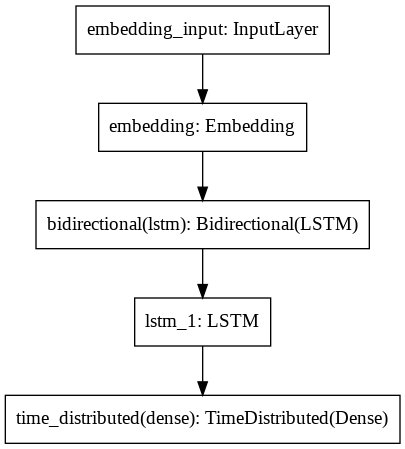

In [28]:
plot_model(model)

In [29]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

In [32]:
history = model.fit(train_tokens, np.array(train_tags), batch_size=512, epochs=3, validation_split=0.02)

Epoch 1/3
1146/1146 [==============================] - 1266s 1s/step - loss: 0.3831 - accuracy: 0.9040 - val_loss: 0.2475 - val_accuracy: 0.9103
Epoch 2/3
1146/1146 [==============================] - 1270s 1s/step - loss: 0.2155 - accuracy: 0.9292 - val_loss: 0.2104 - val_accuracy: 0.9209
Epoch 3/3
1146/1146 [==============================] - 1250s 1s/step - loss: 0.1870 - accuracy: 0.9414 - val_loss: 0.1668 - val_accuracy: 0.9489


In [33]:
model.evaluate(test_tokens, np.array(test_tags))

189/189 [==============================] - 10s 52ms/step - loss: 0.1601 - accuracy: 0.9509


[0.1600683033466339, 0.9508729577064514]

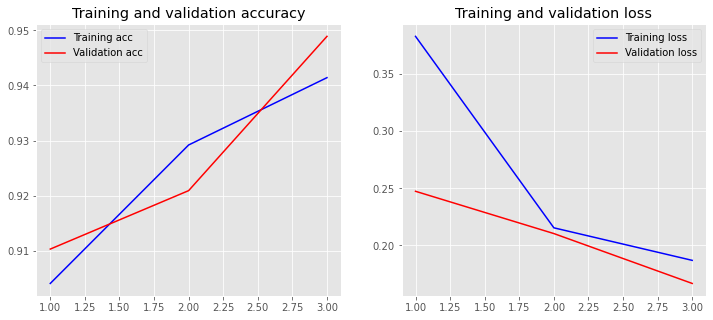

In [34]:
plot_history(history)